#Importing the Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import cv2
import os
import random


#Importing the training data from drive

In [2]:
dataset1 = r'/content/drive/MyDrive/dataset/Train'

In [3]:
categories = ['closed mouth', 'open mouth'] #giving category to the classes
imz_size = 60 #giving image size
data=[]
for category in categories:
  folder1 = os.path.join(dataset1,category) #Joining the images and classes
  label1 = categories.index(category) #giving label to category
  for img1 in os.listdir(folder1):
    img_path = os.path.join(folder1,img1) #joining images and folder
    img_arr = cv2.imread(img_path)
    img_resize = cv2.resize(img_arr,(imz_size,imz_size))
    data.append([img_resize,label1])


In [4]:
len(data)


4096

In [6]:
random.shuffle(data)

In [7]:
X_train= []
Y_train= []
for features,labels in data:
  X_train.append(features)
  Y_train.append(labels)

In [8]:
import numpy as np
X_train= np.array(X_train)
Y_train= np.array(Y_train)

In [9]:
X_train=X_train/255


In [ ]:
X_train.shape

(4096, 60, 60, 3)

In [10]:
Y_train[:3]

array([1, 0, 0])

In [11]:
Y_train_reshape = Y_train.reshape(len(Y_train),1*1)

In [12]:
Y_train_reshape[:3]

array([[1],
       [0],
       [0]])

In [13]:
Y_train_categorical = keras.utils.to_categorical(Y_train_reshape,num_classes=2,dtype='float32')


#Importing the test data from drive

In [14]:
dataset2 = r'/content/drive/MyDrive/dataset/Test'

In [15]:
data1=[]
for category in categories:
  folder2 = os.path.join(dataset2,category)
  label2 = categories.index(category)
  for img2 in os.listdir(folder2):
    img_path2 = os.path.join(folder2,img2)
    img2_arr = cv2.imread(img_path2)
    img2_resize = cv2.resize(img2_arr,(imz_size,imz_size))
    data1.append([img2_resize,label2])

In [ ]:
len(data1)

1023

In [16]:
random.shuffle(data1)

In [17]:
X_test = []
Y_test = []
for features,labels in data1:
  X_test.append(features)
  Y_test.append(labels)

In [18]:
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [19]:
X_test = X_test/255

In [ ]:
X_test.shape

(1023, 60, 60, 3)

In [20]:
Y_test_reshape = Y_test.reshape(len(Y_test),1*1)

In [21]:
Y_test_reshape[:3]

array([[1],
       [0],
       [0]])

In [22]:
Y_test_categorical = keras.utils.to_categorical(Y_test_reshape,num_classes=2,dtype='float32')


#Plotting the images

In [36]:
#visualising the images
from matplotlib import pyplot as plt
def plot_images(x,y,index):
  plt.figure(figsize=(12,8))
  plt.imshow(x[index])
  plt.xlabel(categories[y[index]])

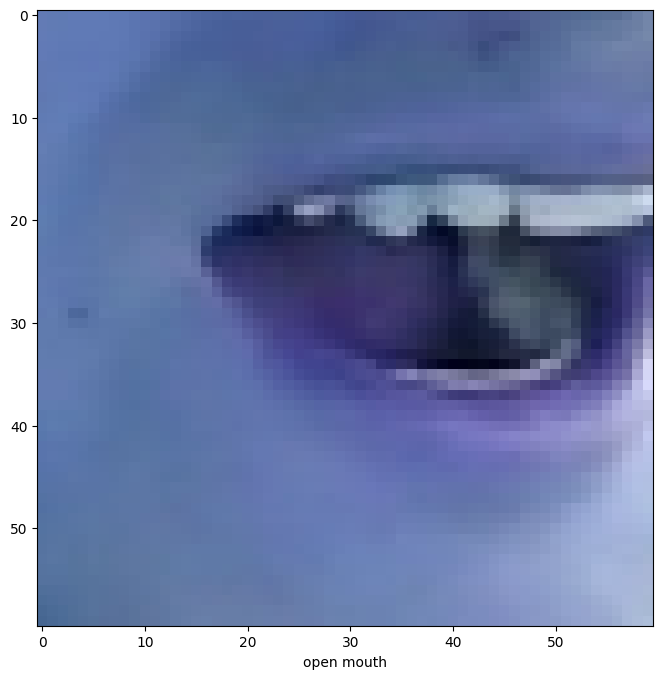

In [ ]:
plot_images(X_train,Y_train,2)

#Building the CNN

In [ ]:
model1 = keras.Sequential([
    keras.layers.Conv2D(filters=500,kernel_size=(3,3),activation='relu',input_shape=(60,60,3)),
    keras.layers.MaxPool2D(pool_size=(2,2)),

    keras.layers.Conv2D(filters=400,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),

    keras.layers.Conv2D(filters=256,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),

    keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),

    keras.layers.Flatten(),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(0.1),

    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.1),

    keras.layers.Dense(2,activation='softmax'),



])

In [ ]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
model1.fit(X_train,Y_train_categorical,validation_data=(X_test,Y_test_categorical),batch_size=5,epochs=20)

Epoch 1/20
820/820 [==============================] - 20s 20ms/step - loss: 0.3313 - accuracy: 0.8706 - val_loss: 2.8625 - val_accuracy: 0.5044
Epoch 2/20
820/820 [==============================] - 16s 19ms/step - loss: 0.2179 - accuracy: 0.9282 - val_loss: 1.8680 - val_accuracy: 0.5044
Epoch 3/20
820/820 [==============================] - 16s 19ms/step - loss: 0.1944 - accuracy: 0.9333 - val_loss: 2.8610 - val_accuracy: 0.5083
Epoch 4/20
820/820 [==============================] - 17s 20ms/step - loss: 0.1673 - accuracy: 0.9414 - val_loss: 4.0821 - val_accuracy: 0.5103
Epoch 5/20
820/820 [==============================] - 17s 21ms/step - loss: 0.1560 - accuracy: 0.9500 - val_loss: 3.6609 - val_accuracy: 0.5034
Epoch 6/20
820/820 [==============================] - 16s 19ms/step - loss: 0.1271 - accuracy: 0.9609 - val_loss: 3.7894 - val_accuracy: 0.5083
Epoch 7/20
820/820 [==============================] - 16s 20ms/step - loss: 0.1208 - accuracy: 0.9612 - val_loss: 2.1880 - val_accuracy:

##Model is not performing well on CNN layers, may be it can't understand the pattern thus we can use data argumentation in which model can see the images from different view.

#Data Argumentation

In [23]:
#Image datagenerator
from keras.preprocessing.image import ImageDataGenerator

In [24]:
train_generator=ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.5, 1.2],
    rotation_range=30,
)

In [25]:
test_generator=ImageDataGenerator(
    rescale=1./255,
)

In [26]:
train_datagen = train_generator.flow_from_directory(
    '/content/drive/MyDrive/dataset/Train',
    target_size=(60,60),
    batch_size=5,
    class_mode='categorical'
)

Found 4096 images belonging to 2 classes.


In [27]:
test_datagen = test_generator.flow_from_directory(
    '/content/drive/MyDrive/dataset/Test',
    target_size=(60,60),
    batch_size=5,
    class_mode='categorical'
)

Found 1023 images belonging to 2 classes.


In [28]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=512,kernel_size=(3,3),input_shape=(60,60,3),activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),

    keras.layers.Conv2D(256,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),

    keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),



    keras.layers.Flatten(),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(2,activation='softmax')

])

##Visualising the CNN and ANN Network

In [29]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 8.6 MB/s eta 0:00:00


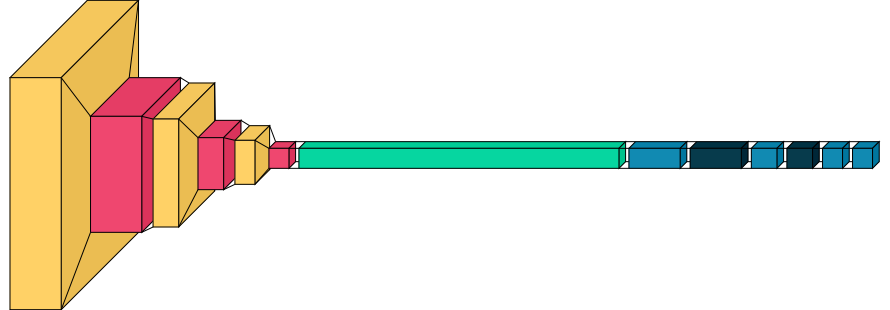

In [30]:
import visualkeras
visualkeras.layered_view(model)

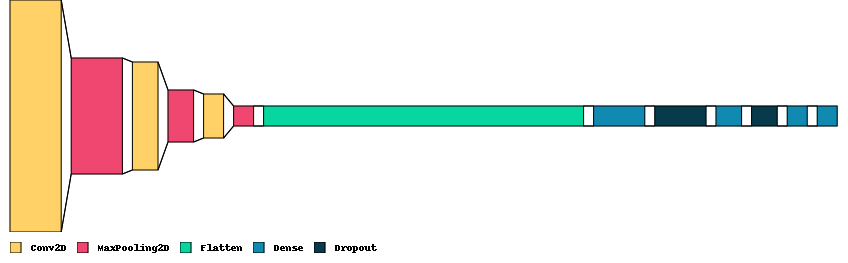

In [31]:
#plotting the layers with name
visualkeras.layered_view(model,legend=True,draw_volume=False)

In [32]:
from keras.utils import plot_model

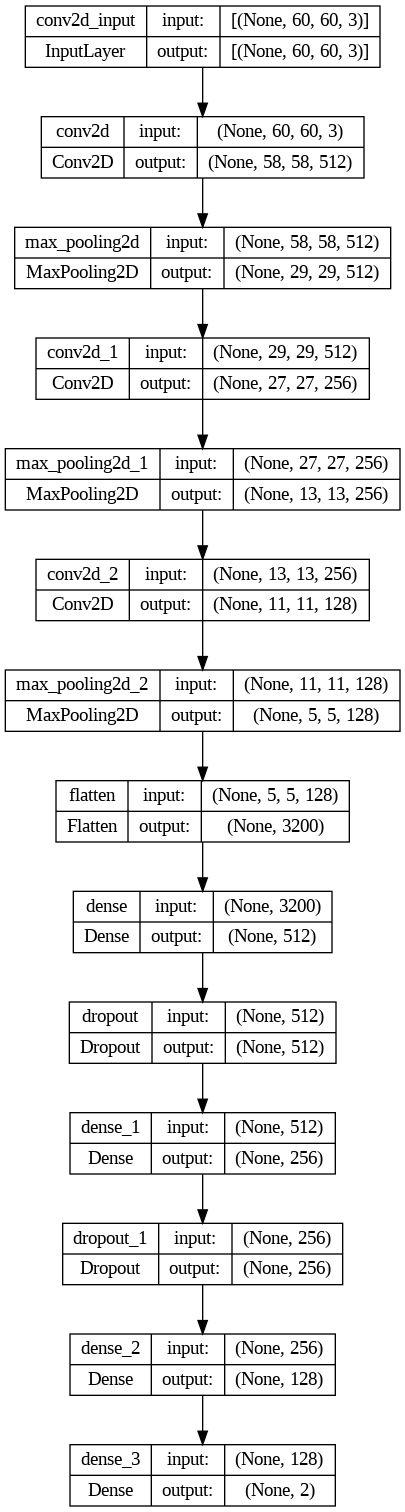

In [33]:
plot_model(model,to_file='model_plot.png',show_shapes=True,show_layer_names=True)

In [34]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
history = model.fit_generator(train_datagen,validation_data=test_datagen,epochs=30)

<ipython-input-34-74741e475e2a>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_datagen,validation_data=test_datagen,epochs=30)


Epoch 1/30
820/820 [==============================] - 38s 28ms/step - loss: 0.4044 - accuracy: 0.8359 - val_loss: 0.3082 - val_accuracy: 0.8964
Epoch 2/30
820/820 [==============================] - 28s 34ms/step - loss: 0.2820 - accuracy: 0.9011 - val_loss: 0.2710 - val_accuracy: 0.8768
Epoch 3/30
820/820 [==============================] - 24s 29ms/step - loss: 0.2556 - accuracy: 0.9031 - val_loss: 0.2735 - val_accuracy: 0.9032
Epoch 4/30
820/820 [==============================] - 36s 44ms/step - loss: 0.2365 - accuracy: 0.9177 - val_loss: 0.2089 - val_accuracy: 0.9091
Epoch 5/30
820/820 [==============================] - 21s 25ms/step - loss: 0.2128 - accuracy: 0.9214 - val_loss: 0.2595 - val_accuracy: 0.8807
Epoch 6/30
820/820 [==============================] - 21s 25ms/step - loss: 0.2355 - accuracy: 0.9143 - val_loss: 0.1578 - val_accuracy: 0.9404
Epoch 7/30
820/820 [==============================] - 20s 24ms/step - loss: 0.2000 - accuracy: 0.9360 - val_loss: 0.1789 - val_accuracy:

#Plotting loss vs Val_loss

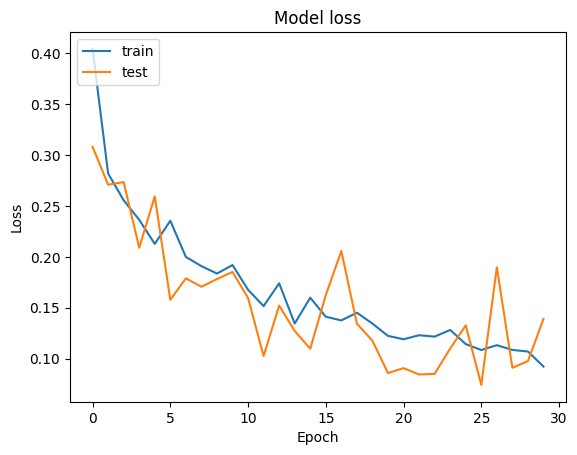

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

#Plotting Accuracy vs val_accuracy

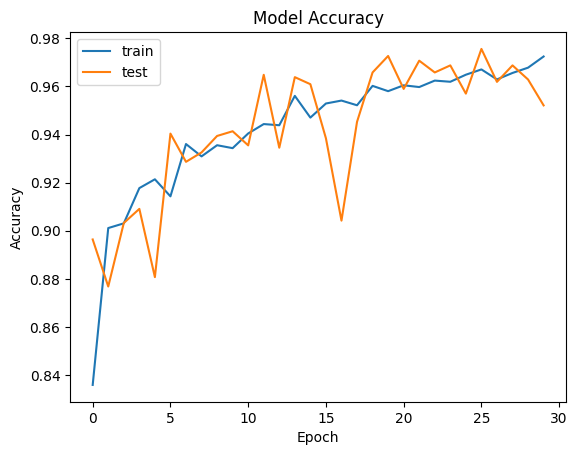

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

#Data argumentation is giving good accuracy so we can proceed with data argumentation.

#Plotting Confusion matrix

In [39]:
y_pred = model.predict(X_test).round(2)

32/32 [==============================] - 2s 32ms/step


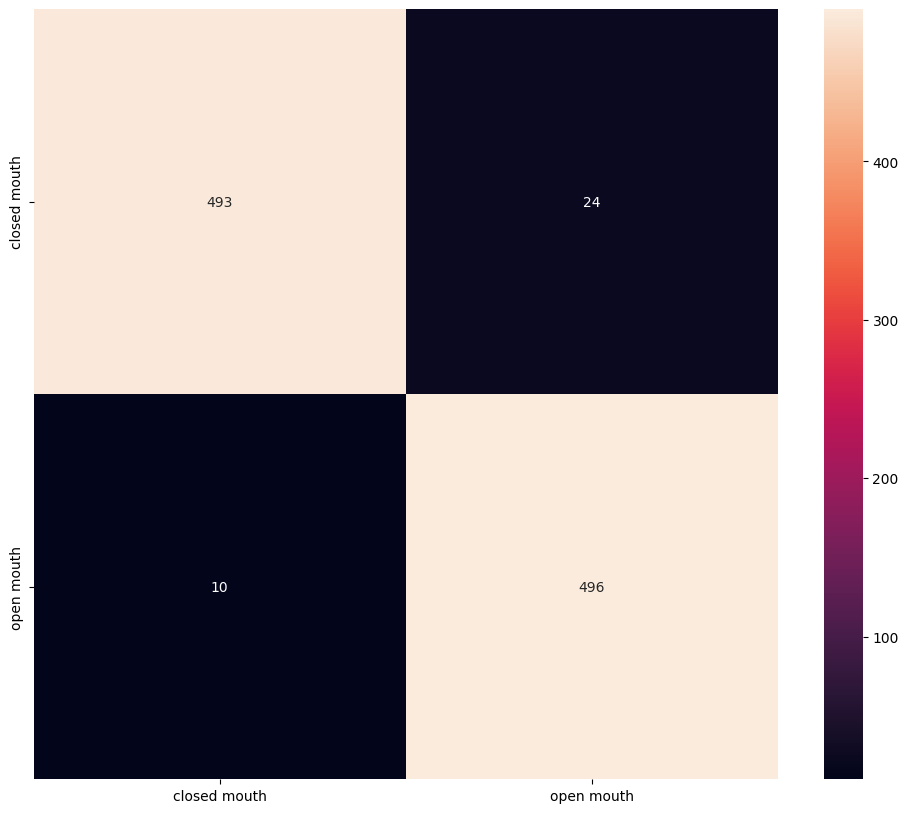

In [40]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(12,10))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(Y_test,y_pred_labels)
sns.heatmap(cm,annot=True,fmt='d',xticklabels=categories,yticklabels=categories)
plt.show()

#Plotting precision recall and f1 score

In [41]:
from sklearn.metrics import classification_report
cr = classification_report(Y_test,y_pred_labels,target_names=categories)
print(cr)

              precision    recall  f1-score   support

closed mouth       0.98      0.95      0.97       517
  open mouth       0.95      0.98      0.97       506

    accuracy                           0.97      1023
   macro avg       0.97      0.97      0.97      1023
weighted avg       0.97      0.97      0.97      1023



#Saving the model


In [42]:
model.save('/content/drive/MyDrive/dataset/Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
input_image = input('Enter the path of image:-')
input_arr = cv2.imread(input_image)
input_resize = cv2.resize(input_arr,(60,60))
input_reshape = input_resize.reshape(1,60,60,3)
print(categories[np.argmax(model.predict(input_reshape))])

Enter the path of image:-/content/drive/MyDrive/614-00388842en_Masterfile.jpg
1/1 [==============================] - 0s 102ms/step
open mouth
